# Week 5  Deep Net

Classify the CIFAR-10 dataset using deep net - 2 dense layers


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

## Load the dataset and set-up the labels

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
## Plot a random image

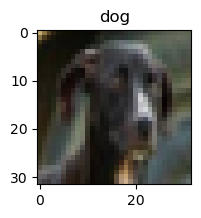

In [13]:
i=542
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title((labels[int(label)]))
plt.imshow(image)
plt.show()

## Normalise and reshape the input data

In [4]:
y_input = tf.keras.utils.to_categorical(y_train)  #one hot encoder
x_input = (np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0).astype(np.float32)

## Create the 2-layer neural network

In [5]:
layer1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
def predict(x):
    # input Layer
    middle_layer = layer1(x)

    # logits Layer
    output_layer = layer2(middle_layer)
    return output_layer

## Define the loss function as the cross-entropy loss

In [6]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

## Create the training routines

In [7]:
lr = 0.001
train_steps = 2500
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

## Now we run the training

In [8]:
#we could use this more easily with keras
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables()) #getting all 
                                                         #the trainable variables from our two layers
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))


2023-05-30 16:15:43.559118: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 16:15:44.683625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14660 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5
2023-05-30 16:15:44.685029: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-30 16:15:45.040368: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Training Step:0 Loss = tf.Tensor(2.4740229, shape=(), dtype=float32)


2023-05-30 16:15:45.751024: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-30 16:15:45.969916: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-30 16:15:46.152274: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Training Step:100 Loss = tf.Tensor(1.8188121, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.6364074, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(1.5666473, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(1.516925, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(1.4731762, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(1.4390584, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(1.4118407, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(1.3876886, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(1.3647444, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(1.3418396, shape=(), dtype=float32)
Training Step:1100 Loss = tf.Tensor(1.3197683, shape=(), dtype=float32)
Training Step:1200 Loss = tf.Tensor(1.3022543, shape=(), dtype=float32)
Training Step:1300 Loss = tf.Tensor(1.2802862, shape=(), dtype=float32)
Training Step:1400 Loss = tf.Tensor(1.2635711, shape=(), dtype=float32)
Tr

## Print out the accuracy on the training data

In [9]:
y_prob = predict(x_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.61546


## Test on the test data

In [10]:
## shallow should be around 0.4 accuracy
x_test_input = (np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.4974


## Plot a few images with their classification

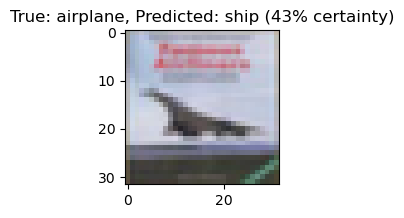

In [11]:
i=3

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()